In [265]:
import pandas as pd
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [266]:
test = pd.read_csv("C:\\Users\\Ambarish Deb\\Desktop\\STUDY\\Nuclei\\Internship\\Titanic\\test.csv")

In [267]:
train2 = pd.read_csv("C:\\Users\\Ambarish Deb\\Desktop\\STUDY\\Nuclei\\Internship\\Titanic\\train.csv")

In [268]:
test.shape, train.shape

((418, 11), (891, 12))

In [269]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index = True)

In [270]:
data.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C,test
996,997,NaN,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S,test
997,998,NaN,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q,test
998,999,NaN,3,"Ryan, Mr. Edward",male,NaN,0,0,383162,7.7500,NaN,Q,test


In [271]:
#Exploratory Data Analysis
data.shape

(1309, 13)

In [272]:
data['Survived'].value_counts()


0.0    549
1.0    342
Name: Survived, dtype: int64

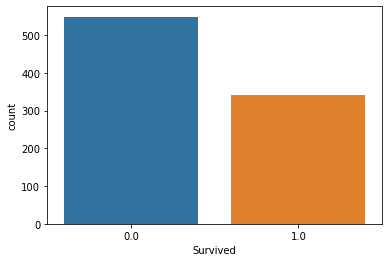

In [273]:
sns.countplot(x ="Survived", data = data)

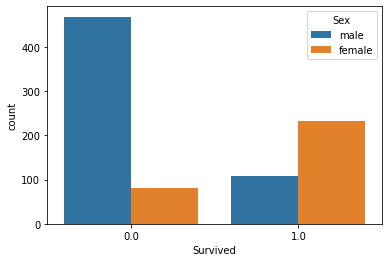

In [274]:
sns.countplot (x ="Survived", hue = "Sex", data = data)
#more females survived than males

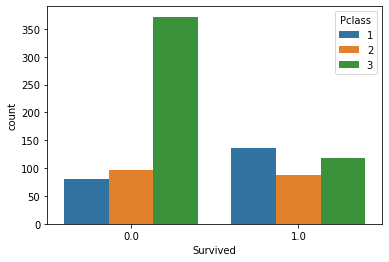

In [275]:
sns.countplot (x ="Survived", hue = "Pclass", data = data)
#first class passengers had the highest chance of survival, followed by second and third class.

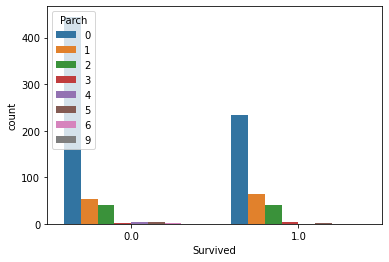

In [276]:
sns.countplot (x ="Survived", hue = "Parch", data = data)
#people who didn't have parents or children had higher chance of survival

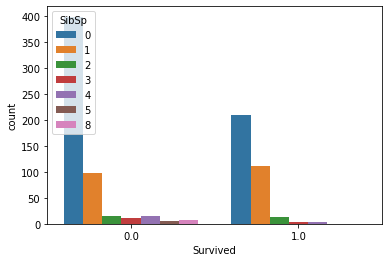

In [277]:
sns.countplot (x ="Survived", hue = "SibSp", data = data)
#people who didn't have siblings or spouses had higher chance of survival

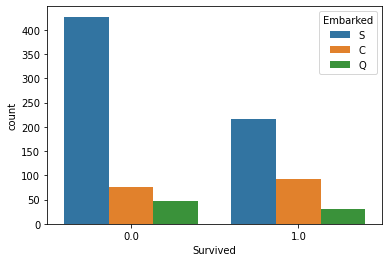

In [278]:
sns.countplot (x ="Survived", hue = "Embarked", data = data)

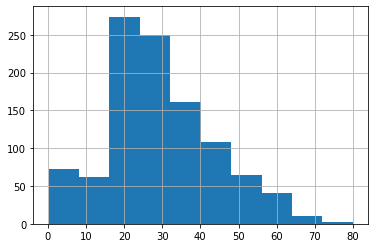

In [279]:
data ["Age"]. hist ()
#Majority of people fall within ages 20-40.

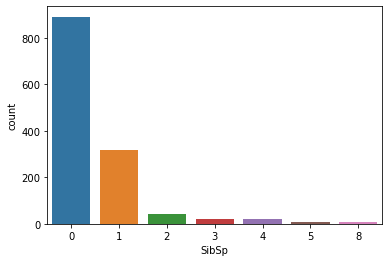

In [280]:
sns.countplot (x ="SibSp", data = data)
#Most people had no siblings or spouses

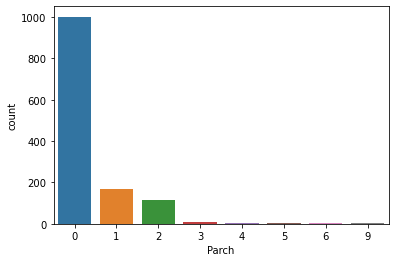

In [281]:
sns.countplot (x ="Parch", data = data)
#Most people had no parents or children

In [282]:
#To confirm some of our observations and assumptions, we can analyze feature correlations by pivoting features against each other.
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [283]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [284]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [285]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [286]:
#DATA CLEANING
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [287]:
data["Age"].fillna(data["Age"].mean(), inplace=True)


In [288]:
data["Fare"].fillna(data["Fare"].median(), inplace=True)


In [289]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [290]:
data['Embarked'].fillna(('S'), inplace = True)

In [291]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [292]:
data['Survived'].fillna(('0'), inplace = True)

In [293]:
#dropping unnecessary columns
data.drop (columns = ['Name'], axis = 1, inplace = True)

In [294]:
data.drop (columns = ['PassengerId'], axis = 1, inplace = True)

In [295]:
data.drop (columns = ['Ticket'], axis = 1, inplace = True)

In [296]:
data.drop (columns = ['Cabin'], axis = 1, inplace = True)

In [297]:
#encoding variables
data = pd.get_dummies(data, columns=['Sex','Embarked','Pclass'])
data.head()

,Survived,Age,SibSp,Parch,Fare,source,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,1,0,7.2500,train,0,1,0,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,train,1,0,1,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,train,1,0,0,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,train,1,0,0,0,1,1,0,0
4,0.0,35.0,0,0,8.0500,train,0,1,0,0,1,0,0,1


In [298]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

train.to_csv("titanic_train_modified.csv",index=False)
test.to_csv("titanic_test_modified.csv",index=False)

In [299]:
train2 = pd.read_csv("titanic_train_modified.csv")
test2 = pd.read_csv("titanic_test_modified.csv")

In [300]:
train2.head()

,Survived,Age,SibSp,Parch,Fare,source,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,1,0,7.2500,train,0,1,0,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,train,1,0,1,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,train,1,0,0,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,train,1,0,0,0,1,1,0,0
4,0.0,35.0,0,0,8.0500,train,0,1,0,0,1,0,0,1


In [301]:
train2.drop(columns = ['source'], axis = 1, inplace = True)

In [302]:
#CREATING TRAIN VARIABLES
y_train= train2['Survived']
x_train= train2.drop (['Survived'], axis = 1 )

In [303]:
test2.head()

,Survived,Age,SibSp,Parch,Fare,source,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,test,0,1,0,1,0,0,0,1
1,0,47.0,1,0,7.0000,test,1,0,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,test,0,1,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,test,0,1,0,0,1,0,0,1
4,0,22.0,1,1,12.2875,test,1,0,0,0,1,0,0,1


In [304]:
#CREATING TEST VARIABLE

x_test = test2.drop(['Survived'], axis = 1)
x_test.drop(['source'], axis = 1, inplace = True)

In [310]:
#Training and using ML Models
#Models used-  SVM, Naive Bayes, Logistic Regression, KNN, Decision Trees and Random Forest

def classification_model(model, x_test, x_train, y_train):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = round(model.score(x_train, y_train) * 100, 2)
    print("Accuracy of ",type(model).__name__,"Model: ",score, "%")
   
    

In [311]:
algo = [SVC(), GaussianNB(), LogisticRegression (solver = 'liblinear'), KNeighborsClassifier(n_neighbors = 3),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)] 
for model in algo:
    classification_model(model, x_test, x_train, y_train)

Accuracy of  SVC Model:  68.69 %
Accuracy of  GaussianNB Model:  78.68 %
Accuracy of  LogisticRegression Model:  80.58 %
Accuracy of  KNeighborsClassifier Model:  83.5 %
Accuracy of  DecisionTreeClassifier Model:  98.2 %
Accuracy of  RandomForestClassifier Model:  98.2 %


In [312]:
""" While both Decision Tree and Random Forest score the  same, we choose to use Random Forest
as they correct for decision trees' habit of overfitting to their training set."""

" While both Decision Tree and Random Forest score the  same, we choose to use Random Forest\nas they correct for decision trees' habit of overfitting to their training set."

In [318]:
test1 = pd.read_csv("C:\\Users\\Ambarish Deb\\Desktop\\STUDY\\Nuclei\\Internship\\Titanic\\test.csv")
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
pd.DataFrame({'PassengerId': test1['PassengerId'], 'Survived': y_pred})
output = pd.DataFrame({'PassengerId': test1['PassengerId'], 'Survived': y_pred})
output.to_csv('my_submission.csv', index= False)
print('Submission was saved successully with a score of: ', score,".")

Submission was saved successully with a score of:  0.9820426487093153 .


In [316]:
data.head()

,Survived,Age,SibSp,Parch,Fare,source,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,1,0,7.2500,train,0,1,0,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,train,1,0,1,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,train,1,0,0,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,train,1,0,0,0,1,1,0,0
4,0.0,35.0,0,0,8.0500,train,0,1,0,0,1,0,0,1
